In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot(*args):
    count = len(args)
    fig, ax = plt.subplots(1,count)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    if count==1:
        ax.imshow(args[0], cmap="gray")
    else:
        for i in range(len(ax)):
            ax[i].imshow(args[i], cmap="gray")
    plt.show()

In [2]:
# image_i = cv2.imread("i.jpg", cv2.IMREAD_GRAYSCALE)
# image_j = cv2.imread("j.jpg", cv2.IMREAD_GRAYSCALE)

image_i = cv2.imread("cm1.png")
image_j = cv2.imread("cm2.png")

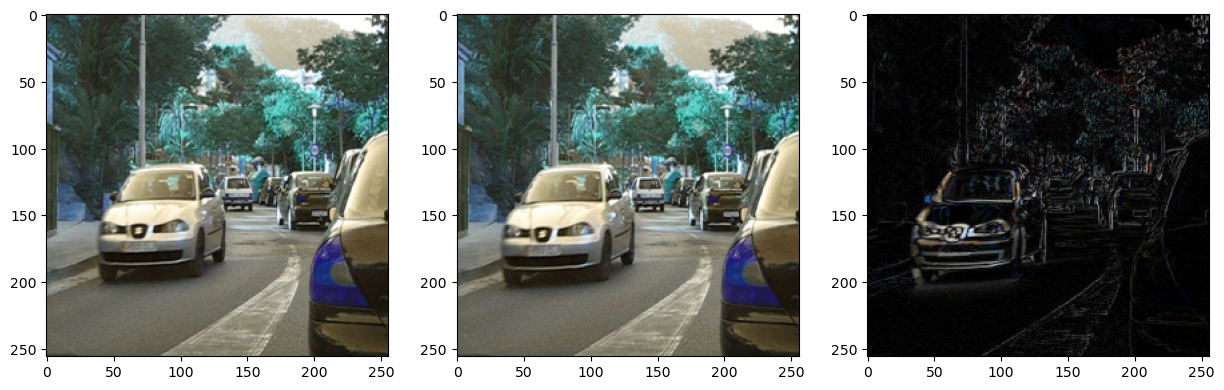

In [3]:
cp_1 = image_i.astype("int16")
cp_2 = image_j.astype("int16")
diff = np.abs(cp_1 - cp_2)

plot(image_i, image_j, diff)

(240, 320, 3)
(120, 160, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

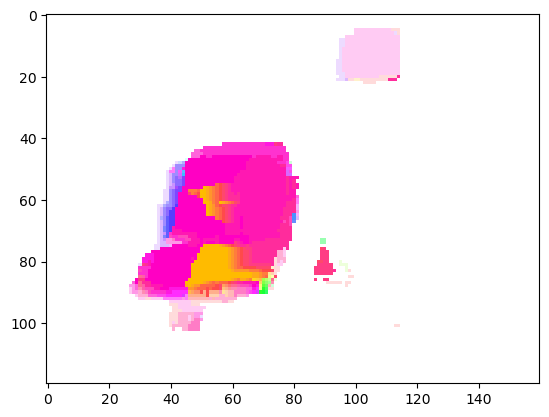

In [4]:
# image_i = cv2.imread("cm1.png")
# image_j = cv2.imread("cm2.png")
def flow_block(img_name_1, img_name_2, dx=5, dy=5, w=5):
    image_i = cv2.imread(img_name_1)
    image_j = cv2.imread(img_name_2)
    
    print(image_i.shape)
    
    image_i = cv2.resize(image_i, (image_i.shape[1]//2, image_i.shape[0]//2))
    image_j = cv2.resize(image_j, (image_j.shape[1]//2, image_j.shape[0]//2))
    
    print(image_i.shape)
    
    image_i = cv2.cvtColor(image_i, cv2.COLOR_BGR2GRAY)
    image_j = cv2.cvtColor(image_j, cv2.COLOR_BGR2GRAY)
    
    X,Y = image_i.shape
    
    u,v = np.zeros((X,Y)), np.zeros((X,Y))
    
    for j in range(w, Y - w):
        for i in range(w, X - w):
    
            frame_i = np.float32(image_i[j-w:j+w+1, i-w:i+w+1])
            min_distance = np.inf
    
            for x in range(-dx, dx + 1):
                for y in range(-dy, dy + 1):
                    frame_j = np.float32(image_j[y+j-w:y+j+w+1, x+i-w:x+i+w+1])
                    if frame_j.shape != (2*w+1,2*w+1) or frame_i.shape != (2*w+1,2*w+1):
                        pass
                    else:
                        frame_j = np.float32(image_j[y+j-w:y+j+w+1, x+i-w:x+i+w+1])
                        
                        distance = np.sqrt(np.sum(np.square(frame_j - frame_i)))
                        if distance < min_distance:
                            min_distance = distance
                            u[j, i] = y
                            v[j, i] = x
    
    mag, angle = cv2.cartToPolar(u, v)
    
    HSV = np.zeros((image_i.shape[0], image_i.shape[1], 3), np.uint8)
    
    HSV[:, :, 0] = angle * 90 / np.pi
    HSV[:, :, 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    HSV[:, :, 2] = np.full(image_i.shape, 255)
    
    RGB = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB)
    plt.imshow(RGB)
    return RGB

# flow_block("cm1.png", "cm2.png")
flow_block("i.jpg", "j.jpg")

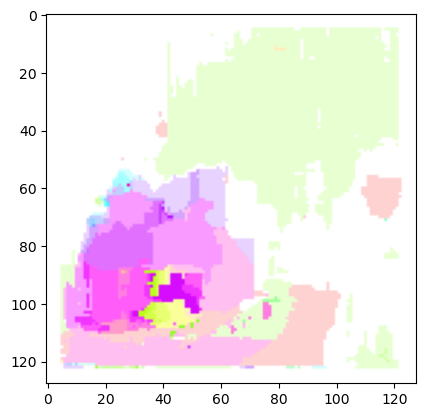

In [48]:
# plt.quiver(u,v)


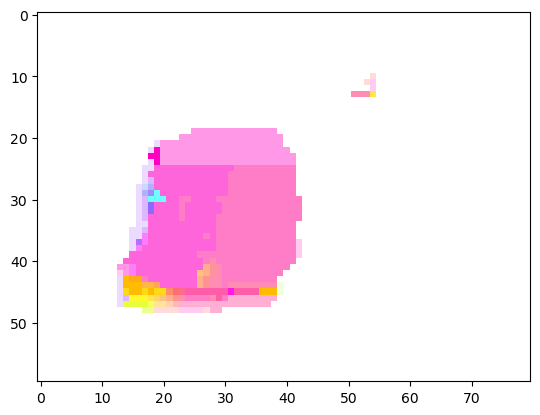

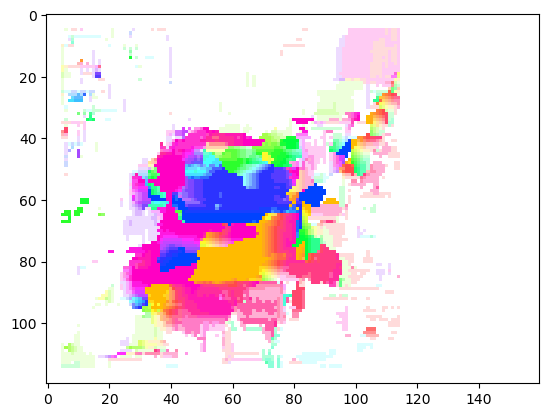

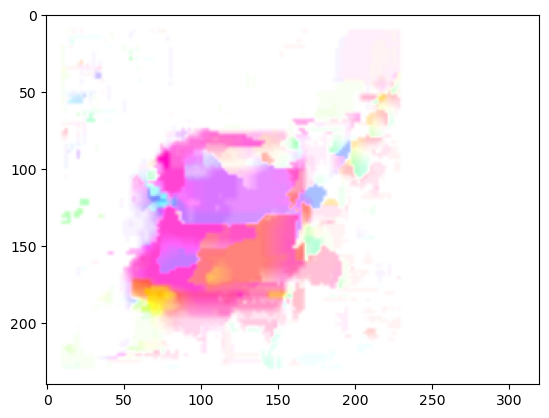

In [102]:
def flow_block(i_org, I, J, dx=5, dy=5, w=5):
    
    X,Y = I.shape
    
    u,v = np.zeros((X,Y)), np.zeros((X,Y))
    
    for j in range(w, Y - w):
        for i in range(w, X - w):
    
            frame_i = np.float32(I[j-w:j+w+1, i-w:i+w+1])
            min_distance = np.inf
    
            for x in range(-dx, dx + 1):
                for y in range(-dy, dy + 1):
                    frame_j = np.float32(J[y+j-w:y+j+w+1, x+i-w:x+i+w+1])
                    if frame_j.shape != (2*w+1,2*w+1) or frame_i.shape != (2*w+1,2*w+1):
                        pass
                    else:
                        frame_j = np.float32(J[y+j-w:y+j+w+1, x+i-w:x+i+w+1])
                        
                        distance = np.sqrt(np.sum(np.square(frame_j - frame_i)))
                        if distance < min_distance:
                            min_distance = distance
                            u[j, i] = y
                            v[j, i] = x
    
    return u, v

def vis_flow(u, v):
    mag, angle = cv2.cartToPolar(u, v)
    
    HSV = np.zeros((u.shape[0], u.shape[1], 3), np.uint8)
    
    HSV[:, :, 0] = angle * 90 / np.pi
    HSV[:, :, 1] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    HSV[:, :, 2] = np.full(u.shape, 255)
    
    RGB = cv2.cvtColor(HSV, cv2.COLOR_HSV2RGB)
    plt.imshow(RGB)
    plt.show()

def pyramid(image, max_scale=3):
    images =[image]
    for k in range(1, max_scale):
        images.append(cv2.resize(images[k-1], (0,0), fx=0.5, fy=0.5))
    return images

def do_all():
    I_img = cv2.imread("i.jpg", cv2.IMREAD_GRAYSCALE)
    J_img = cv2.imread("j.jpg", cv2.IMREAD_GRAYSCALE)
    I_org = I_img

    I_pyramid = pyramid(I_img)
    J_pyramid = pyramid(J_img)

    I = I_pyramid[-1]

    u_total = np.zeros(I_img.shape)
    v_total = np.zeros(I_img.shape)

    for i in range(len(I_pyramid) -1 , 0, -1):
        scalar = 2**i
        I_new = I.copy()
        J = J_pyramid[i]
        
        u,v = flow_block(None, I, J)
        
        u_scaled = cv2.resize(u, (0,0), fx=scalar, fy=scalar, interpolation=cv2.INTER_LINEAR)
        v_scaled = cv2.resize(v, (0,0), fx=scalar, fy=scalar, interpolation=cv2.INTER_LINEAR)

        u_scaled *= scalar
        v_scaled *= scalar
        
        u_total += u_scaled
        v_total += v_scaled
        
        vis_flow(u,v)


        #we set the values of the I_new to the calculated shifted values, so we have to iterate over the whole img
        Y,X = u.shape
        for x in range(X):
            for y in range(Y):
                new_y_cord = int(u[y,x] + y)
                new_x_cord = int(v[y,x] + x)

                
                I_new[y,x] = I[new_y_cord, new_x_cord]
        I = cv2.resize(I_new, (0,0), fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
        # plot(I, I_new, I-I_new)

    vis_flow(u_total, v_total)

do_all()
# plt.imshow(cv2.imread("i.jpg", cv2.IMREAD_GRAYSCALE))